# 08 Graphs
__Math 3080: Fundamentals of Data Science__

Reading:
* McKinney, Chapter 

Outline:
1. Summary of the different plots we can use
2. Overview of MatplotLib
3. Overview of Seaborn
4. Interactive plots
    * Plotly

-----
## 8.1 Summary of different plots
There are a number of plots that we can use to display the data. Each plot is valuable in its own way. Which plot you use depends on the type of data. For example, 
* Categorical data is often displayed in groups
  * barplot/countplot
  * piechart
* Quantitative data is often displayed by individual measurements
  * boxplot
  * scatterplot
  * timeseries graph.

In [9]:
import numpy as np
import pandas as pd

crimes_long = pd.read_csv('../Datasets/Crime_Statistics_2000-2020.csv')
crimes_long

,Year,Type of Crime,Number of Crimes
0,2000,Assault,523
1,2000,Burglary,349
2,2000,Robbery,128
3,2000,Vehicle Theft,223
4,2001,Assault,610
...,...,...,...
77,2019,Burglary,5498
78,2019,Robbery,3583
79,2019,Vehicle Theft,4359
80,2020,Assault,4205


In [12]:
crimes_wide = crimes_long.pivot(index='Year', columns='Type of Crime', values='Number of Crimes')
crimes_wide

Type of Crime,Assault,Burglary,Robbery,Vehicle Theft
Year,,,,
2000,523.0,349.0,128.0,223.0
2001,610.0,287.0,105.0,195.0
2002,724.0,365.0,142.0,217.0
2003,819.0,429.0,178.0,308.0
2004,897.0,516.0,221.0,393.0
2005,1054.0,643.0,283.0,472.0
2006,1215.0,752.0,329.0,529.0
2007,1382.0,864.0,408.0,648.0
2008,1567.0,1012.0,480.0,742.0


## 8.2 Overview of MatplotLib

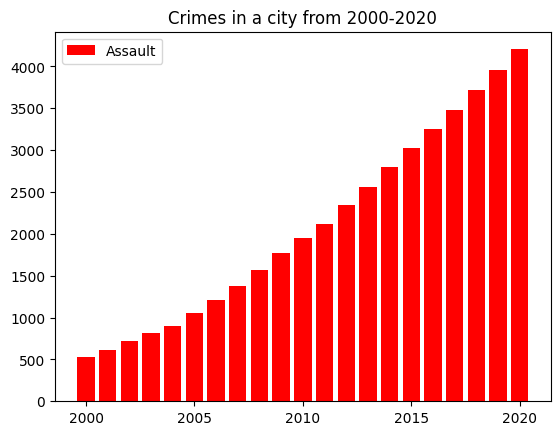

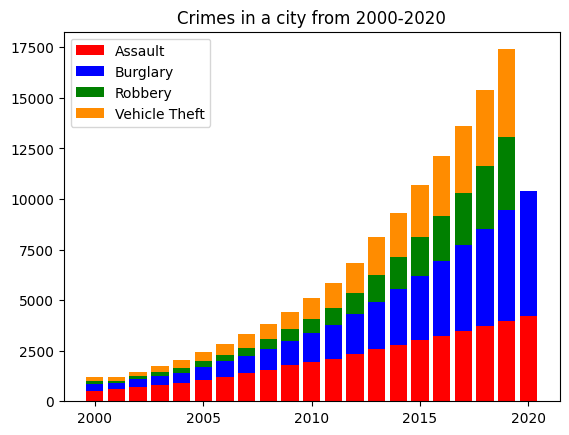

In [76]:
import matplotlib.pyplot as plt

# Single Barplot
fig, ax = plt.subplots()

ax.bar(crimes_wide.index, crimes_wide['Assault'], label='Assault', color='red')
ax.set_title('Crimes in a city from 2000-2020')
plt.legend()
plt.show()

# Multiple Barplot
fig2, ax2 = plt.subplots()

ax2.bar(crimes_wide.index, crimes_wide['Assault'], label='Assault', color='red')
ax2.bar(crimes_wide.index, crimes_wide['Burglary'],
        bottom=crimes_wide['Assault'],
        label='Burglary', color='blue')
ax2.bar(crimes_wide.index, crimes_wide['Robbery'],
        bottom=crimes_wide['Assault']+crimes_wide['Burglary'], label='Robbery', color='green')
ax2.bar(crimes_wide.index, crimes_wide['Vehicle Theft'],
        bottom=crimes_wide['Assault']+crimes_wide['Burglary']+crimes_wide['Robbery'], label='Vehicle Theft', color='darkorange')
ax2.set_title('Crimes in a city from 2000-2020')
plt.legend()
plt.show()

<AxesSubplot: xlabel='Year'>

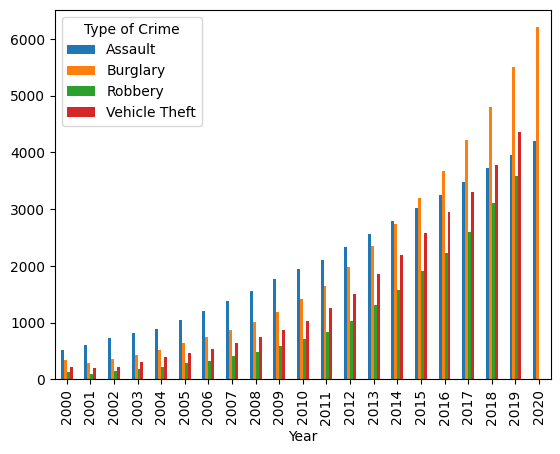

In [78]:
# Using the entire DataFrame
crimes_wide.plot(kind='bar', stacked=False)

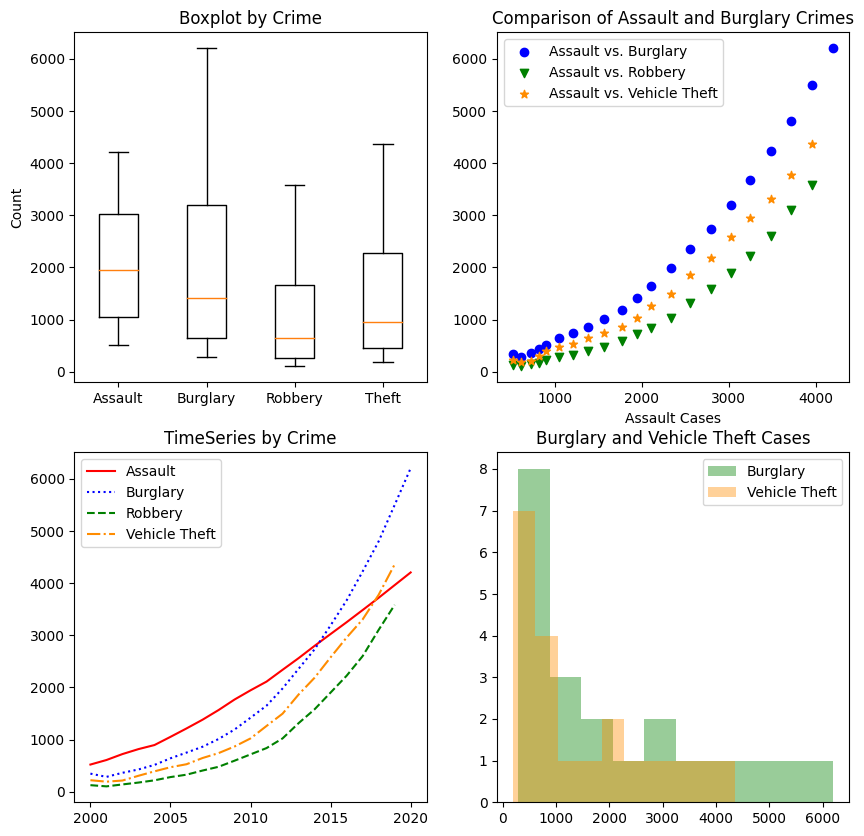

In [50]:
fig, ax = plt.subplots(2,2, sharey=False, figsize=(10,10))

# Boxplot

assault = crimes_long[crimes_long['Type of Crime'] == 'Assault']
burglary = crimes_long[crimes_long['Type of Crime'] == 'Burglary']
robbery = crimes_long[crimes_long['Type of Crime'] == 'Robbery']
theft = crimes_long[crimes_long['Type of Crime'] == 'Vehicle Theft']

ax[0,0].boxplot([assault['Number of Crimes'],burglary['Number of Crimes'],robbery['Number of Crimes'],theft['Number of Crimes']])
ax[0,0].set_xticklabels(['Assault','Burglary','Robbery','Theft'])
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Boxplot by Crime')

# Lineplot
ax[1,0].plot(assault['Year'], assault['Number of Crimes'], color='red', label='Assault')
ax[1,0].plot(burglary['Year'], burglary['Number of Crimes'], color='blue', linestyle=':', label='Burglary')
ax[1,0].plot(robbery['Year'], robbery['Number of Crimes'], color='green', linestyle='--', label='Robbery')
ax[1,0].plot(theft['Year'], theft['Number of Crimes'], color='darkorange', linestyle='-.', label='Vehicle Theft')
ax[1,0].set_title('TimeSeries by Crime')
ax[1,0].legend()

# Scatterplot
ax[0,1].scatter(crimes_wide['Assault'],crimes_wide['Burglary'], color='blue', label='Assault vs. Burglary')
ax[0,1].scatter(crimes_wide['Assault'],crimes_wide['Robbery'], color='green', label='Assault vs. Robbery', marker='v')
ax[0,1].scatter(crimes_wide['Assault'],crimes_wide['Vehicle Theft'], color='darkorange', label='Assault vs. Vehicle Theft',
                marker='*')
ax[0,1].set_title('Comparison of Assault and Burglary Crimes')
ax[0,1].set_xlabel('Assault Cases')
ax[0,1].legend()

# Histogram
ax[1,1].hist(burglary['Number of Crimes'], color='green', alpha=0.4, label='Burglary')
ax[1,1].hist(theft['Number of Crimes'], color='darkorange', alpha=0.4, label='Vehicle Theft')
ax[1,1].set_title('Burglary and Vehicle Theft Cases')
ax[1,1].legend()

plt.show()

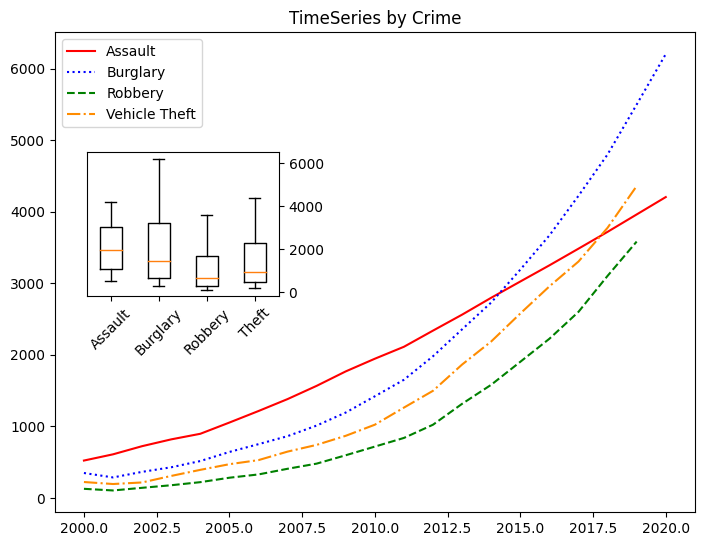

In [144]:
## INSETS
fig = plt.figure()

ax = fig.add_axes([0,0,1,1]) # Main image
ax2 = fig.add_axes([0.05, 0.45, 0.3, 0.3]) # Inset image

# Lineplot
ax.plot(assault['Year'], assault['Number of Crimes'], color='red', label='Assault')
ax.plot(burglary['Year'], burglary['Number of Crimes'], color='blue', linestyle=':', label='Burglary')
ax.plot(robbery['Year'], robbery['Number of Crimes'], color='green', linestyle='--', label='Robbery')
ax.plot(theft['Year'], theft['Number of Crimes'], color='darkorange', linestyle='-.', label='Vehicle Theft')
ax.set_title('TimeSeries by Crime')
ax.legend()

# Boxplot
ax2.boxplot([assault['Number of Crimes'],burglary['Number of Crimes'],robbery['Number of Crimes'],theft['Number of Crimes']])
ax2.set_xticklabels(['Assault','Burglary','Robbery','Theft'])
ax2.yaxis.tick_right()
plt.xticks(rotation=45)

plt.show()

## 8.3 Overview of Seaborn

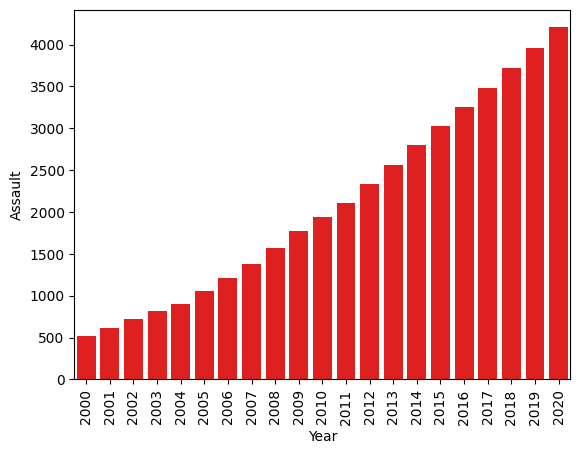

In [91]:
import seaborn as sns

# Barplot - Just one column
sns.barplot(data = crimes_wide,
            x = crimes_wide.index,
            y = 'Assault',
            color='red')
plt.xticks(rotation=90)
plt.show()

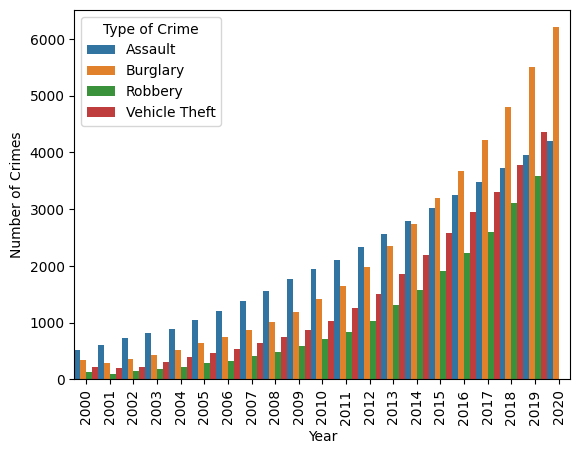

In [93]:
# Barplot - All columns
sns.barplot(data = crimes_long,
            x = 'Year',
            y = 'Number of Crimes',
            hue = 'Type of Crime',
           width=1.0, dodge=True)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Count of records in Crime Dataset\n(Not number of Crimes)')

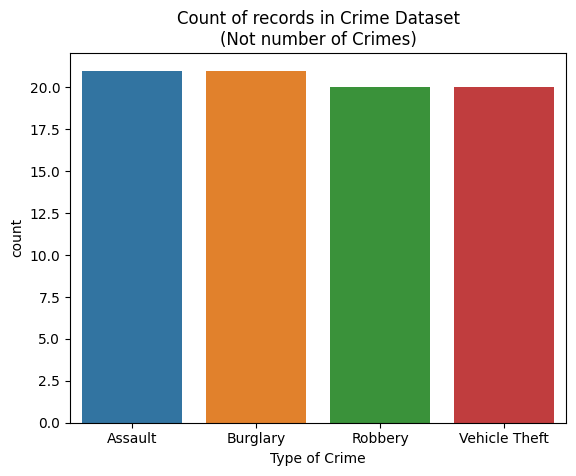

In [94]:
# Countplot
sns.countplot(data = crimes_long, x = 'Type of Crime')
plt.title('Count of records in Crime Dataset\n(Not number of Crimes)')

Text(0.5, 1.0, 'Boxplots of crime counts by Type of Crime')

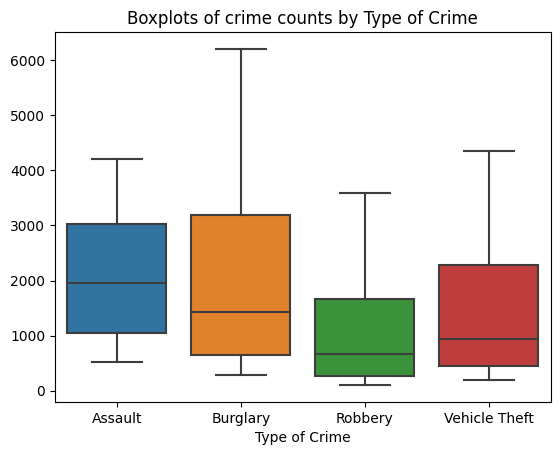

In [113]:
# Boxplot
sns.boxplot(data = crimes_wide)
plt.title('Boxplots of crime counts by Type of Crime')

Text(0.5, 1.0, 'Growth of Crime by Type of Crime')

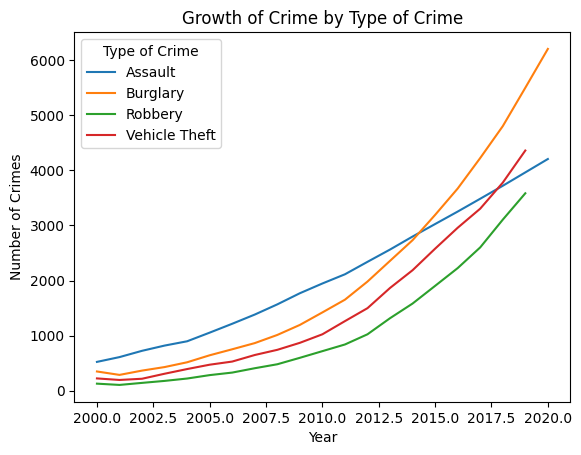

In [114]:
# Lineplot
sns.lineplot(data = crimes_long, x = 'Year', y = 'Number of Crimes',
             hue = 'Type of Crime')
plt.title('Growth of Crime by Type of Crime')

Text(0.5, 1.0, 'Relationships between Assault and other crimes')

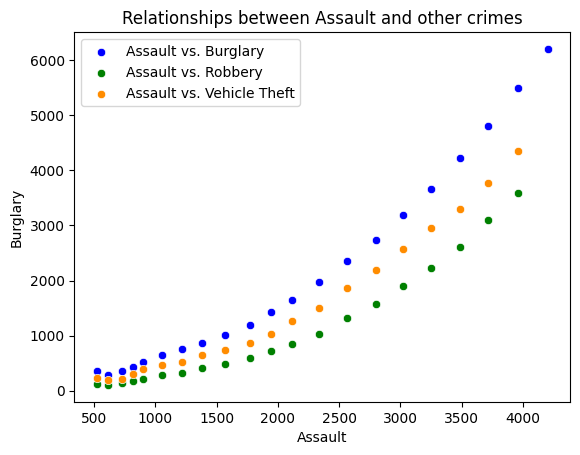

In [108]:
# Scatterplot
sns.scatterplot(data = crimes_wide, x = 'Assault', y = 'Burglary',
                c='blue', label='Assault vs. Burglary')
sns.scatterplot(data = crimes_wide, x = 'Assault', y = 'Robbery',
                c='green', label='Assault vs. Robbery')
sns.scatterplot(data = crimes_wide, x = 'Assault', y = 'Vehicle Theft',
                c='darkorange', label='Assault vs. Vehicle Theft')
plt.legend()
plt.title('Relationships between Assault and other crimes')

/tmp/ipykernel_370/2654785303.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crimes_long['Type of Crime'])


ValueError: could not convert string to float: 'Assault'

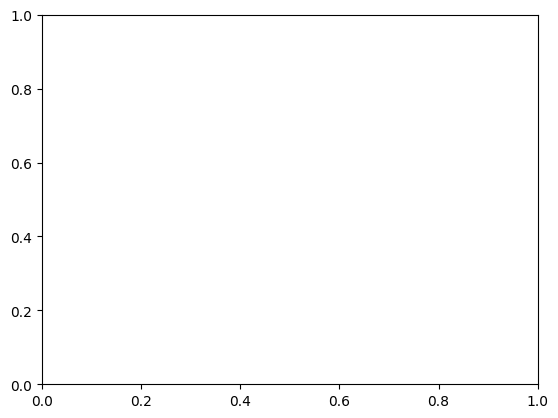

In [116]:
# Histogram
#sns.histplot(data = crimes_long, x = 'Number of Crimes', hue='Type of Crime')
sns.distplot(crimes_long['Type of Crime'])

In [ ]:
# More general plots - relational plots

In [ ]:
# More general plots - categorical plots

* Distplot
* Jointplot
  * Hex
* Pairplot
* Rugplot
  * KDEplot

In [ ]:
# 

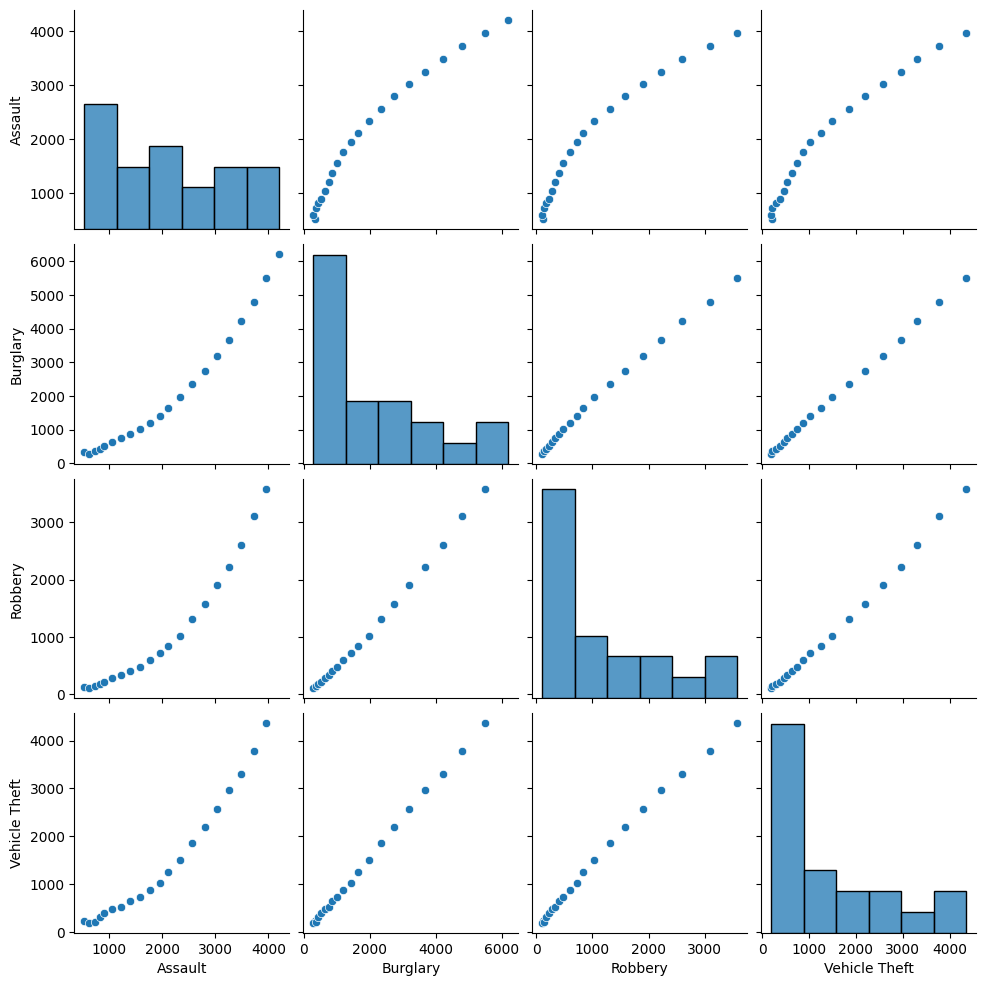

In [117]:
sns.pairplot(data=crimes_wide)

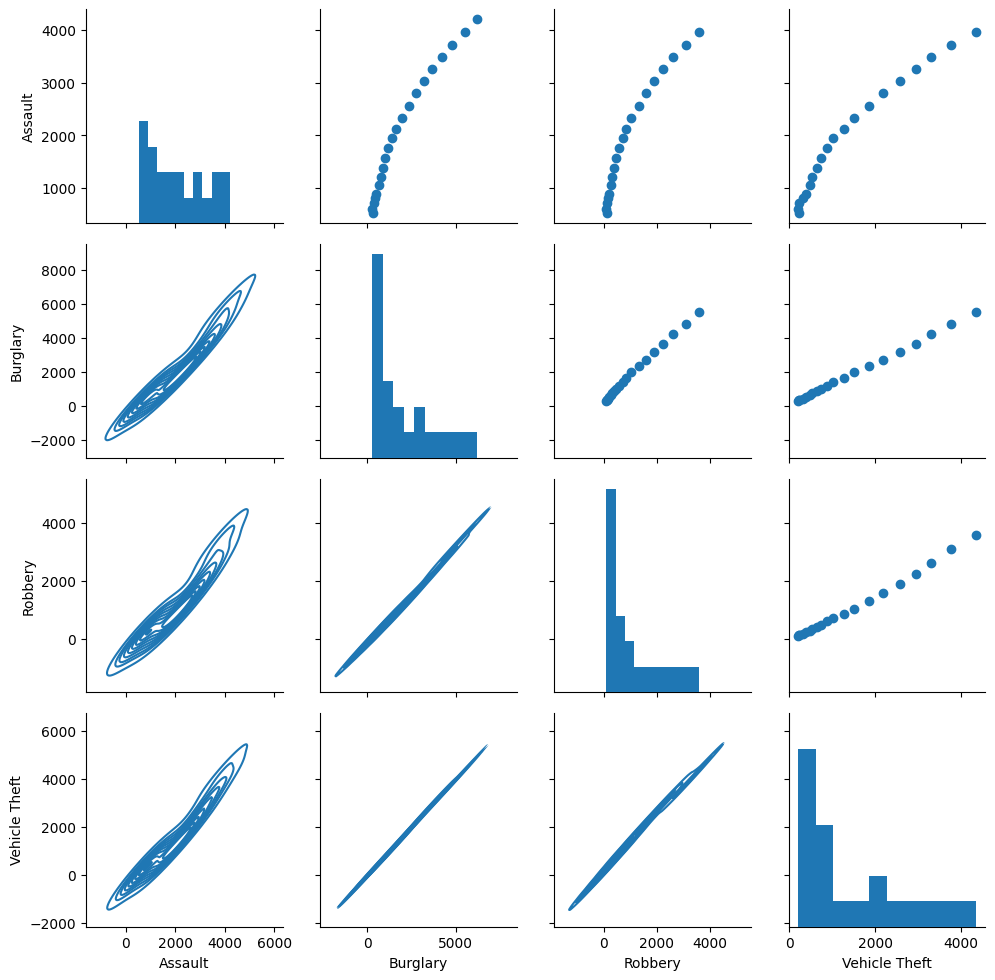

In [118]:
g = sns.PairGrid(crimes_wide)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## 8.4 Interactive Graphs